In [1]:
from __future__ import print_function
import tensorflow as tf

In [2]:
# apt-get install graphviz
# pip install graphviz
from tfdot import tfdot

## Basic 

In [3]:
matrix1 = tf.constant([[3., 3.]],name = 'Matrix1')

matrix2 = tf.constant([[2.],[2.]], name = 'Matrix2')

product = tf.matmul(matrix1, matrix2)

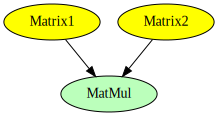

In [4]:
tfdot()

## Session

In [7]:
sess = tf.Session()
print(sess.run(product))
sess.close()

[[ 12.]]


### Context manager

In [8]:
with tf.Session() as sess:
    print(sess.run(product))

[[ 12.]]


### Device context 

In [9]:
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    with tf.device("/cpu:0"):
        m1 = tf.constant([[3., 3.]])
        m2 = tf.constant([[2.],[2.]])
        pd = tf.matmul(m1, m2)
        print(sess.run(pd))

[[ 12.]]


### Interactive session

In [10]:
sess = tf.InteractiveSession()

In [11]:
product.eval()

array([[ 12.]], dtype=float32)

In [12]:
pd.eval()

array([[ 12.]], dtype=float32)

## Variable

In [3]:
state = tf.Variable(0, name="counter")
one = tf.constant(1)
new_value = tf.add(state, one)
update = tf.assign(state, new_value)

init_op = tf.initialize_all_variables()

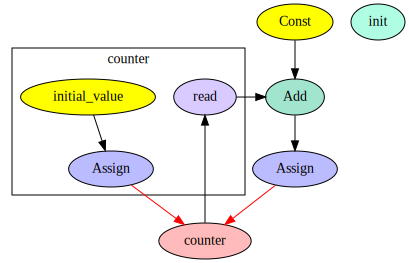

In [4]:
tfdot()

In [15]:
init_op.run()
# state.run() # variables do not run
print(state.eval())

0


In [23]:
for _ in range(300):
    update.eval()

In [24]:
state.eval()

601

In [25]:
sess.run([update]*10)

[602, 602, 602, 602, 602, 602, 602, 602, 602, 602]

### Initialize from another variable

In [21]:
# will back to here later
# tf.ops.reset_default_graph()
# sess.close()
# sess = tf.InteractiveSession()

In [5]:
weights = tf.Variable(tf.random_normal([784, 200], stddev=0.35), name='weights')
w2 = tf.Variable(weights.initialized_value(), name ='w2')
w_twice = tf.Variable(weights.initialized_value()*0.2, name="w_twice")

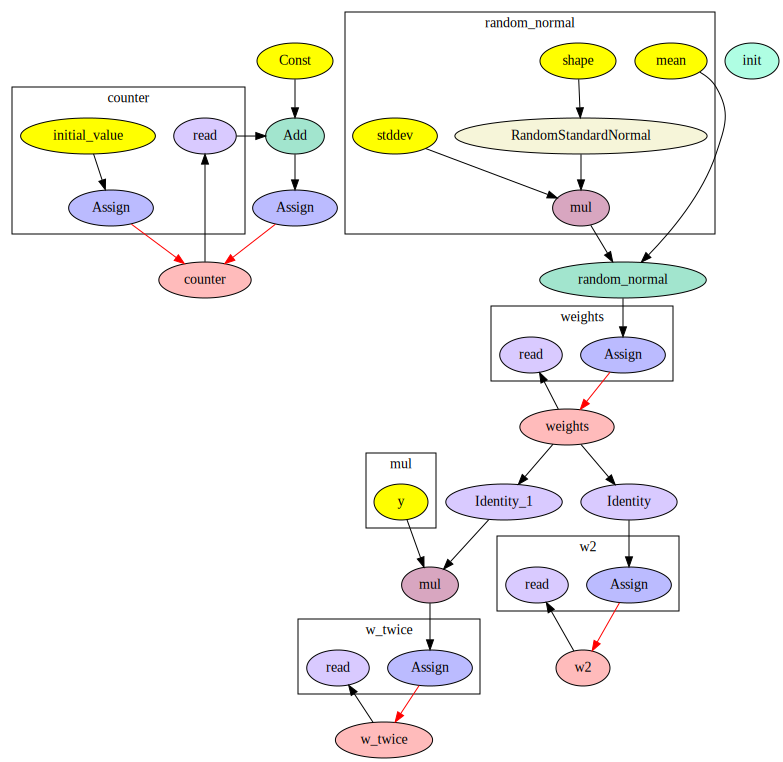

In [6]:
tfdot()

In [24]:
init_op = tf.initialize_all_variables()
init_op.run()

In [25]:
weights.eval()

array([[ 0.04481283, -0.62056214, -0.69336498, ..., -0.30848733,
        -0.34599236, -0.42386416],
       [-0.78550404, -0.10613412,  0.09037922, ...,  0.66008407,
         0.57086742, -0.1224874 ],
       [-0.61029941,  0.35488346, -0.10510538, ..., -0.10046848,
        -0.00810294,  0.00366683],
       ..., 
       [ 0.33449978,  0.02138252, -0.14221951, ..., -0.49634036,
        -0.47021103,  0.12775964],
       [-0.09816289, -0.34331754,  0.03284245, ..., -0.37847662,
         0.16994159,  0.44379511],
       [ 0.36513436,  0.40277815, -0.48408747, ..., -0.46500829,
         0.12536223,  0.04070676]], dtype=float32)

In [27]:
for v in tf.all_variables():
    print(v.name, v)

counter:0 <tensorflow.python.ops.variables.Variable object at 0x7f4f603ba208>
weights:0 <tensorflow.python.ops.variables.Variable object at 0x7f4f603ca278>
w2:0 <tensorflow.python.ops.variables.Variable object at 0x7f4f60369f60>
w_twice:0 <tensorflow.python.ops.variables.Variable object at 0x7f4f60369e10>


## Feeds

In [28]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.mul(input1, input2)
output.eval(feed_dict={input1: [9.], input2: [4.]})

array([ 36.], dtype=float32)

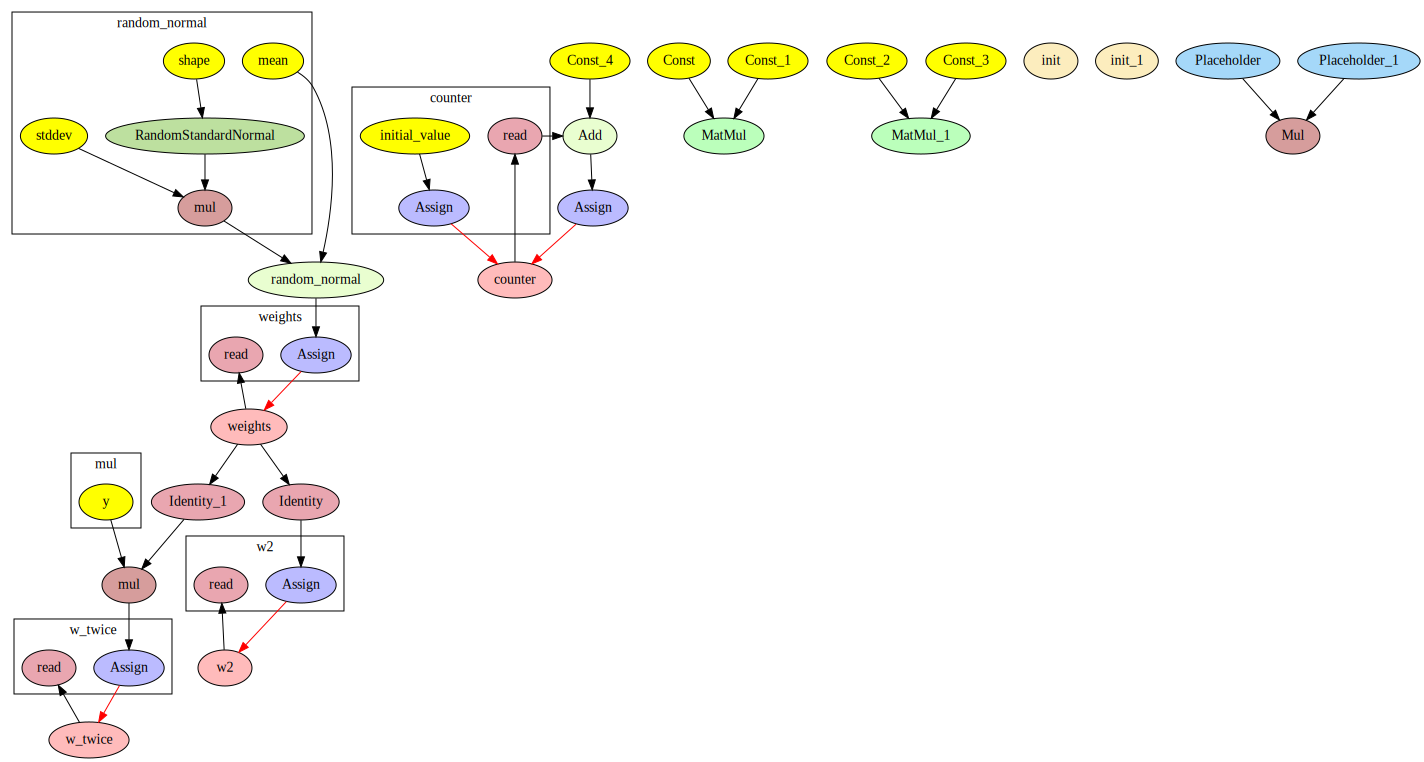

In [29]:
tfdot()